In [8]:
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns

# the pandas dataframe transforms the dictionary data in a table
dat = pd.DataFrame({
  'Model': ['M1', 'M1', 'M1', 'M1', 'M2', 'M2', 'M2', 'M2'],
  'Performance': [0.511, 0.711, 0.611, 0.811, 0.525, 0.655, 0.825, 0.925]
})

print(dat)

  Model  Performance
0    M1        0.511
1    M1        0.711
2    M1        0.611
3    M1        0.811
4    M2        0.525
5    M2        0.655
6    M2        0.825
7    M2        0.925


In [9]:
# perform Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_pval = wilcoxon(dat[dat['Model'] == 'M1']['Performance'], # vector of values for the first model
                                        dat[dat['Model'] == 'M2']['Performance'], # vector of values for the second model
                                        alternative = 'two-sided', 
                                        zero_method = 'wilcox', 
                                        correction=False)

Wilcoxon Signed-Rank Test:
p-value: 0.375


<Axes: xlabel='Model', ylabel='Performance'>

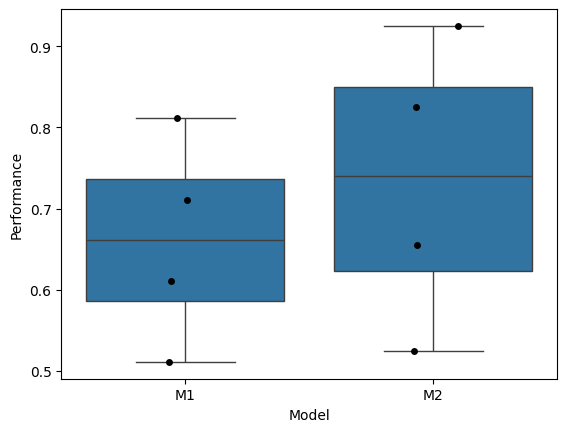

In [10]:
# display test results
print("Wilcoxon Signed-Rank Test:")
#print(f"Statistic: {wilcoxon_stat}")
print(f"p-value: {wilcoxon_pval}")

# plot with statistical results
sns.boxplot(data=dat, x='Model', y='Performance')
sns.stripplot(data=dat, x='Model', y='Performance', color='black', size=5)


In [11]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns

samples = 10

perf = pd.DataFrame({
  'Model': ['M1'] * samples + ['M2'] * samples,
  'Performance': list(np.random.normal(size=samples)) + list(np.random.normal(size=samples) + 1)
})

print(perf)

   Model  Performance
0     M1    -1.047019
1     M1    -0.326276
2     M1     0.921876
3     M1    -1.612325
4     M1    -0.353024
5     M1     0.023242
6     M1    -0.918235
7     M1    -0.548138
8     M1    -0.493322
9     M1    -0.933502
10    M2     0.648705
11    M2    -1.785203
12    M2     2.509070
13    M2     2.528934
14    M2     1.829594
15    M2     1.959809
16    M2     0.598742
17    M2     1.197869
18    M2     1.841381
19    M2     2.322725


In [12]:
# perform Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_pval = wilcoxon(perf[perf['Model'] == 'M1']['Performance'], 
                                        perf[perf['Model'] == 'M2']['Performance'], 
                                        alternative = 'two-sided', 
                                        zero_method = 'wilcox', 
                                        correction=False)

Wilcoxon Signed-Rank Test:
Statistic: 1.0
p-value: 0.00390625
Mean Performance for M1: -0.528672233743926
Mean Performance for M2: 1.365162553068421


<Axes: xlabel='Model', ylabel='Performance'>

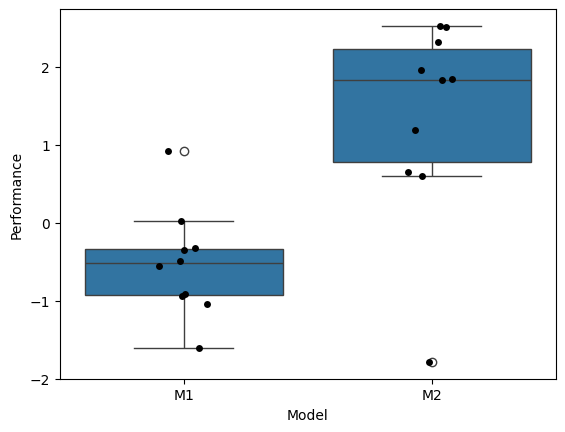

In [13]:
# display test results
print("Wilcoxon Signed-Rank Test:")
print(f"Statistic: {wilcoxon_stat}")
print(f"p-value: {wilcoxon_pval}")

# calculate means
mean_m1 = perf[perf['Model'] == 'M1']['Performance'].mean()
mean_m2 = perf[perf['Model'] == 'M2']['Performance'].mean()

print(f"Mean Performance for M1: {mean_m1}")
print(f"Mean Performance for M2: {mean_m2}")

# plot with statistical results
sns.boxplot(data=perf, x='Model', y='Performance')
sns.stripplot(data=perf, x='Model', y='Performance', color='black', size=5)
